## Capstone Project 2 — Exploratory Data Analysis (EDA) ##

Project Title: Detecting Anomalies in Financial Transactions (Fraud Detection)

Dataset: Credit Card Fraud Detection (Kaggle)

In this notebook we explore the cleaned dataset created in the data wrangling step to understand feature distributions, detect outliers, examine class imbalance, and uncover relationships between features and the target variable. The insights gained here will guide feature engineering, preprocessing, and model building steps downstream.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("creditcard_sample.csv")

In [3]:
print("Shape:", df.shape)
df.head()

Shape: (28924, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,44932.0,1.212868,0.314473,0.280272,0.642528,-0.173938,-0.599932,0.017676,-0.072350,0.009880,...,-0.258437,-0.705438,0.157189,0.037345,0.147432,0.123681,-0.005811,0.027712,1.98,0
1,19676.0,-0.042815,1.176697,0.043358,0.604963,0.091294,-0.161744,-0.890933,-2.588433,0.595272,...,-1.447158,0.011065,0.029984,0.006999,0.413975,0.319339,0.039097,0.259612,0.76,0
2,94533.0,0.270160,0.792771,-0.277856,-0.095859,1.073333,-0.440614,1.029284,-0.374799,1.611696,...,-0.157880,0.112374,-0.130635,0.455802,-0.148961,0.474769,-0.204900,-0.200123,39.99,0
3,29086.0,1.252733,0.293642,0.053431,0.516684,0.076941,-0.295868,-0.004559,-0.029834,0.067626,...,-0.296023,-0.815108,0.093337,-0.504924,0.214941,0.157597,-0.007207,0.021775,0.89,0
4,82168.0,-0.089956,1.251482,0.044823,2.015908,0.537991,1.714838,-1.049764,-2.037580,-0.536713,...,2.541931,0.043431,0.359707,-1.365907,-0.790213,0.074159,0.012837,-0.134409,10.59,0


### About the Dataset

The original dataset contains credit card transactions made by **European cardholders in September 2013**.  
The data covers a **two-day period** and includes **492 fraudulent transactions out of 284,807 total transactions**, making it **highly imbalanced** — only about **0.172%** of all transactions are fraudulent.

The dataset used here in the EDA stage is the **cleaned version** prepared during the Data Wrangling stage.  
All input variables are **numerical** and were created through a **PCA (Principal Component Analysis)** transformation.  
Because of confidentiality, the original feature names and detailed background information are not available.

- **V1, V2, … V28** → Principal components obtained using PCA  
- **Time** → Seconds elapsed between each transaction and the first transaction in the dataset  
- **Amount** → Transaction amount (useful for analyzing spending behavior or cost-sensitive learning)  
- **Class** → Target variable (1 = Fraud, 0 = Non-Fraud)

Due to the **extreme class imbalance**, accuracy alone isn’t a reliable measure of performance.  
Instead, we will use metrics such as **AUC-PR (Area Under the Precision-Recall Curve)** and **AUC-ROC** to evaluate models later in this project.


**Inference:**  
In the previous steps, we confirmed the dataset size and structure. Next, we will check basic summaries to identify any immediate issues or interesting patterns.

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28924 entries, 0 to 28923
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28924 non-null  float64
 1   V1      28924 non-null  float64
 2   V2      28924 non-null  float64
 3   V3      28924 non-null  float64
 4   V4      28924 non-null  float64
 5   V5      28924 non-null  float64
 6   V6      28924 non-null  float64
 7   V7      28924 non-null  float64
 8   V8      28924 non-null  float64
 9   V9      28924 non-null  float64
 10  V10     28924 non-null  float64
 11  V11     28924 non-null  float64
 12  V12     28924 non-null  float64
 13  V13     28924 non-null  float64
 14  V14     28924 non-null  float64
 15  V15     28924 non-null  float64
 16  V16     28924 non-null  float64
 17  V17     28924 non-null  float64
 18  V18     28924 non-null  float64
 19  V19     28924 non-null  float64
 20  V20     28924 non-null  float64
 21  V21     28924 non-null  float64
 22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,...,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000,28924.000000
mean,94690.090236,-0.067337,0.062712,-0.112930,0.079265,-0.036290,-0.026888,-0.092449,0.014728,-0.031095,...,0.006290,0.000472,0.000561,-0.005075,-0.006810,0.003242,0.003272,0.001891,87.324762,0.017010
std,47493.481185,2.162709,1.732804,1.926277,1.546916,1.550938,1.337745,1.621327,1.424856,1.181381,...,0.846792,0.738729,0.640062,0.606036,0.527107,0.484299,0.433611,0.312685,226.178106,0.129311
min,0.000000,-33.404082,-38.436817,-31.103685,-5.175917,-27.737487,-20.367836,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-30.269720,-2.836627,-6.429334,-1.581931,-9.543518,-8.307955,0.000000,0.000000
25%,54290.750000,-0.936031,-0.595484,-0.953111,-0.821182,-0.707821,-0.778948,-0.576566,-0.206469,-0.660013,...,-0.226892,-0.549779,-0.164402,-0.357098,-0.321263,-0.327286,-0.070723,-0.052562,5.390000,0.000000
50%,84683.000000,0.002218,0.082843,0.153467,0.016172,-0.058758,-0.279244,0.034081,0.025629,-0.058409,...,-0.024544,0.007544,-0.009653,0.039048,0.014446,-0.046107,0.002394,0.011844,21.950000,0.000000
75%,139123.500000,1.305764,0.838447,1.002912,0.790924,0.622139,0.396329,0.574168,0.338799,0.590034,...,0.191787,0.526849,0.151552,0.434389,0.341832,0.248110,0.095102,0.080857,77.000000,0.000000
max,172768.000000,2.420346,22.057729,3.893024,12.699542,29.162172,16.410638,21.444508,20.007208,10.370658,...,27.202839,8.361985,17.751731,4.016342,5.852484,3.517346,9.879903,15.870474,8360.000000,1.000000


**Inference:**  
- The dataset has 31 columns: 28 PCA components + Time, Amount, and Class.  
- There are no missing values or categorical features.  
- Some features, especially *Amount* and *Time*, have large ranges that may need scaling or transformation before modeling.


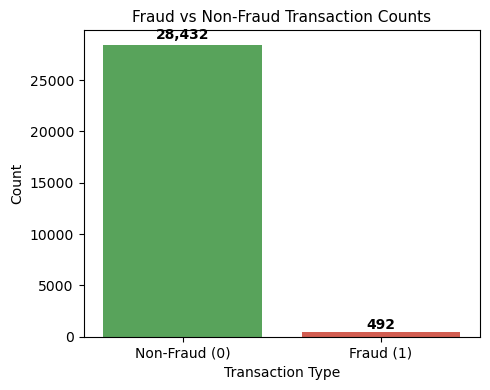

Percentage of fraudulent transactions: 1.7010%


In [11]:
# Count of fraud vs non-fraud
class_counts = df['Class'].value_counts()

plt.figure(figsize=(5,4))
ax = sns.barplot(
    x=['Non-Fraud (0)', 'Fraud (1)'], 
    y=class_counts.values, 
    hue=['Non-Fraud (0)', 'Fraud (1)'],  # fixes the FutureWarning
    dodge=False,
    palette=['#4CAF50','#E74C3C'],
    legend=False
)

# Add value labels with dynamic positioning
for i, value in enumerate(class_counts.values):
    ax.text(
        i, 
        value + (0.01 * value),   # offset = 1% of bar height
        f'{value:,}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold',
        color='black'
    )

plt.title("Fraud vs Non-Fraud Transaction Counts", fontsize=11)
plt.ylabel("Count")
plt.xlabel("Transaction Type")
plt.tight_layout()
plt.show()

# Percentage breakdown
fraud_percent = (class_counts[1] / class_counts.sum()) * 100
print(f"Percentage of fraudulent transactions: {fraud_percent:.4f}%")


**Inference:**  
Only about 1.7% of the transactions are fraud — almost all the others are normal.
Because fraud is so rare, the model needs to be careful to catch those few fraud cases without wrongly flagging too many normal ones.


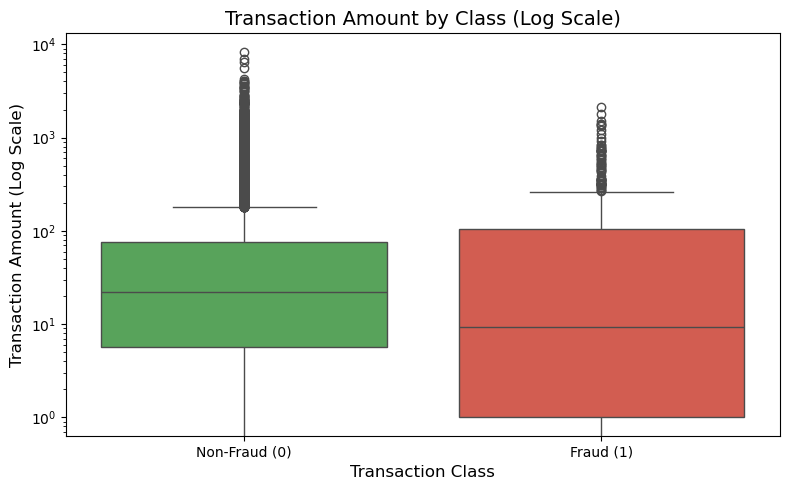

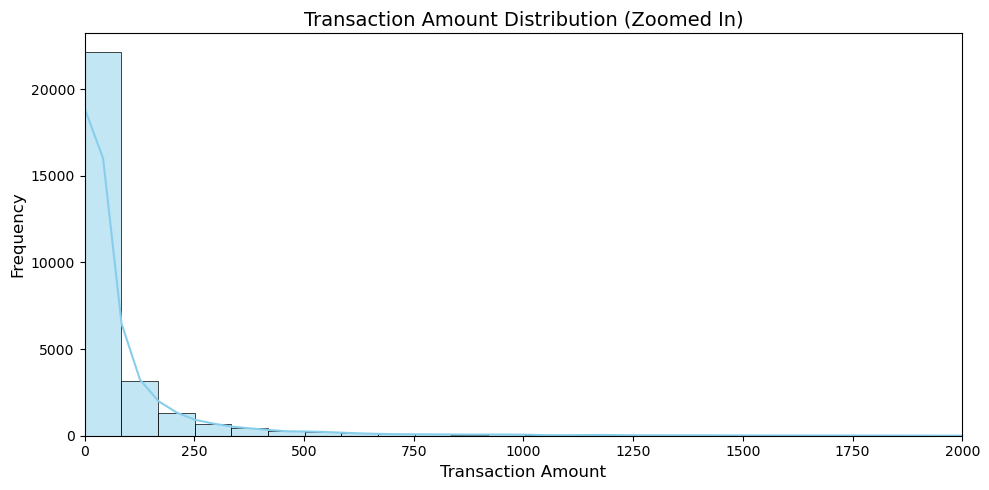

In [32]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(
    x='Class',
    y='Amount',
    data=df,
    hue='Class',        # fixes FutureWarning
    dodge=False,
    palette=['#4CAF50','#E74C3C'],
    legend=False
)
plt.yscale('log')
plt.title("Transaction Amount by Class (Log Scale)", fontsize=14)
plt.xlabel("Transaction Class", fontsize=12)
plt.ylabel("Transaction Amount (Log Scale)", fontsize=12)
plt.xticks([0,1], ['Non-Fraud (0)','Fraud (1)'])
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))

# Plot Transaction Amount with KDE and better binning
sns.histplot(df['Amount'].dropna(), bins=100, kde=True, color='skyblue')

plt.title('Transaction Amount Distribution (Zoomed In)', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Zoom into a more informative range
plt.xlim(0, 2000) 

plt.tight_layout()
plt.show()



**Inference:**  
- Most transactions are **small**, but a few are **very large** (outliers).  
- Fraud can happen with **small or large amounts**.  
- Using a **log scale** makes it easier to see the pattern in a histogram.



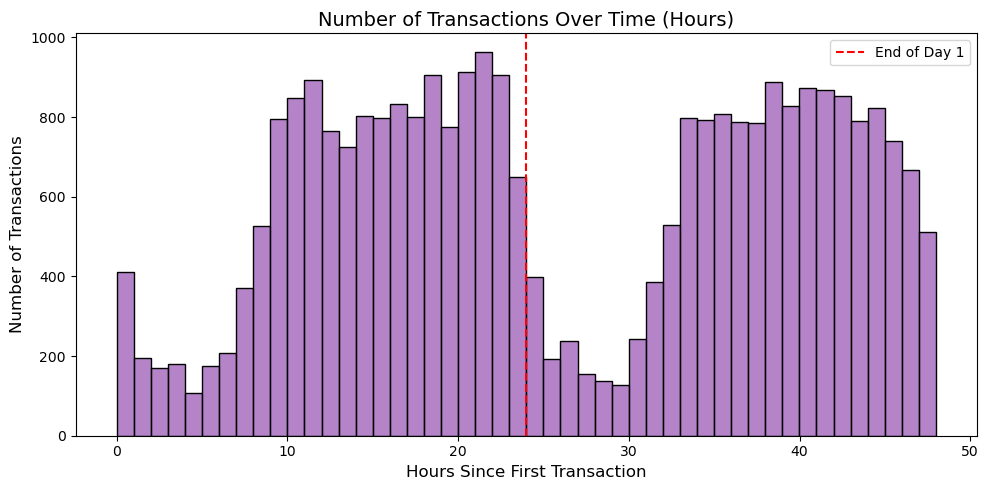

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Plot transaction time (converted from seconds to hours)
sns.histplot(
    df['Time']/3600,  # convert seconds to hours
    bins=48,          # 2 days * 24 hours = 48 bins
    kde=False,
    color='#9B59B6'
)

plt.title("Number of Transactions Over Time (Hours)", fontsize=14)
plt.xlabel("Hours Since First Transaction", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)

# Optional: add vertical lines for day separation
plt.axvline(x=24, color='red', linestyle='--', label='End of Day 1')
plt.legend()

plt.tight_layout()
plt.show()



**Observation:**  
- The x-axis represents **hours since the first transaction** (0–48 hours), and the y-axis shows the **number of transactions**.  
- Transactions are unevenly distributed across the two-day period. Peaks and dips suggest **daily activity patterns** (e.g., daytime vs. nighttime).  
- Adding a vertical line at 24 hours highlights the separation between **Day 1 and Day 2**.

**Inference for Modeling:**  
- The 'Time' feature could be useful for detecting fraud patterns that vary by time of day or day of the week.  
- Time-based features (like hour of day or whether a transaction is in a peak period) may improve model performance.


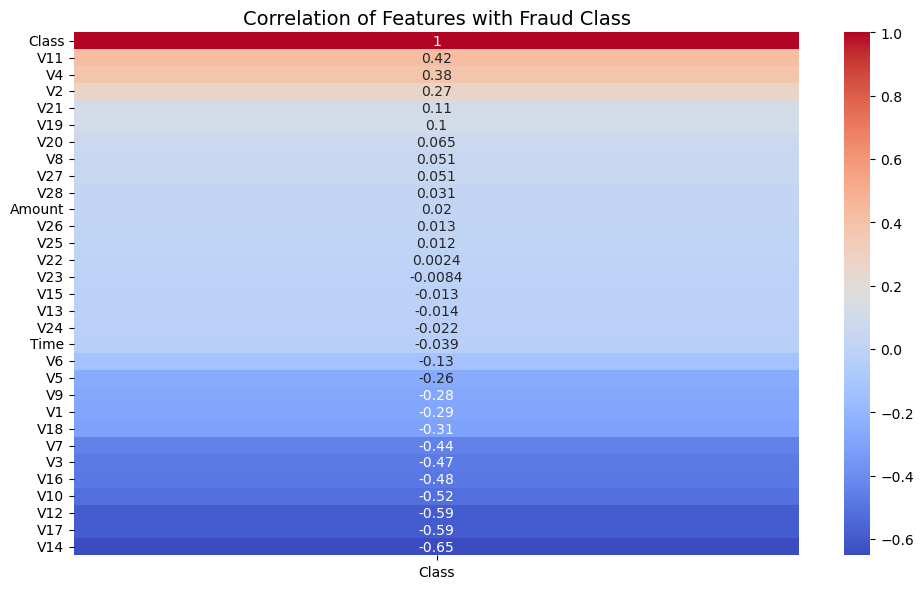

Top 10 features correlated with Class:
 Class    1.000000
V11      0.423192
V4       0.379510
V2       0.270344
V21      0.109878
V19      0.104997
V20      0.065156
V8       0.051324
V27      0.050756
V28      0.031038
Name: Class, dtype: float64


In [20]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap showing correlation of features with Class
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix[['Class']].sort_values(by='Class', ascending=False), 
    annot=True, cmap='coolwarm'
)
plt.title("Correlation of Features with Fraud Class", fontsize=14)
plt.tight_layout()
plt.show()

# Print top 10 features most correlated with Class
corr_with_target = corr_matrix['Class'].sort_values(ascending=False)
print("Top 10 features correlated with Class:\n", corr_with_target.head(10))



**Observation:**  
- The target variable **'Class'** has a perfect correlation with itself, as expected.  
- The features most strongly associated with fraud are **V11, V4, and V2**.  
- Features with weaker correlations may have less impact individually, but they can still be useful when combined with other features.  

**Modeling Recommendation:**  
- Focus on **V11, V4, and V2** when selecting or engineering features.  
- Consider keeping features with lower correlation, as they may reveal important patterns in combination.  
- This approach helps the model concentrate on the features most likely to improve fraud detection.



In [21]:
skewness = df.drop('Class', axis=1).skew().sort_values(ascending=False)
skewness_df = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})
skewness_df.head(10)


,Feature,Skewness
0,Amount,9.863959
1,V28,7.409178
2,V21,6.743250
3,V11,1.508852
4,V4,1.263848
5,V6,0.996369
6,V26,0.615355
7,V19,0.246198
8,V13,0.089949
9,Time,-0.029607


**Observation on Feature Skewness:**  
- Skewness measures how unevenly the data is spread. A value close to 0 means the data is fairly even, while a high positive number means most values are small and a few are very large.  

- From the table, **Amount (9.86), V28 (7.41), and V21 (6.74)** are highly skewed, meaning they have many small values and a few extreme large values.  
- **V11, V4, and V6** are moderately skewed, so their values are somewhat uneven.  
- **V19, V13, and Time** are nearly symmetric, meaning their values are fairly evenly spread.  

**Implication for Modeling:**  
- Highly skewed features may need **scaling or log transformation** to reduce the impact of extreme values.  
- Features with low skewness generally don’t need adjustment.


**Inference:**  
- Many of the features are **uneven** (skewed) with most values being small and a few being very large.  
- Columns like **Amount** and some other features have these extreme values, which can make it harder for the model to learn patterns.  
- Changing the scale of these numbers or using a **log transformation** can help the model handle them better and make predictions more accurate.


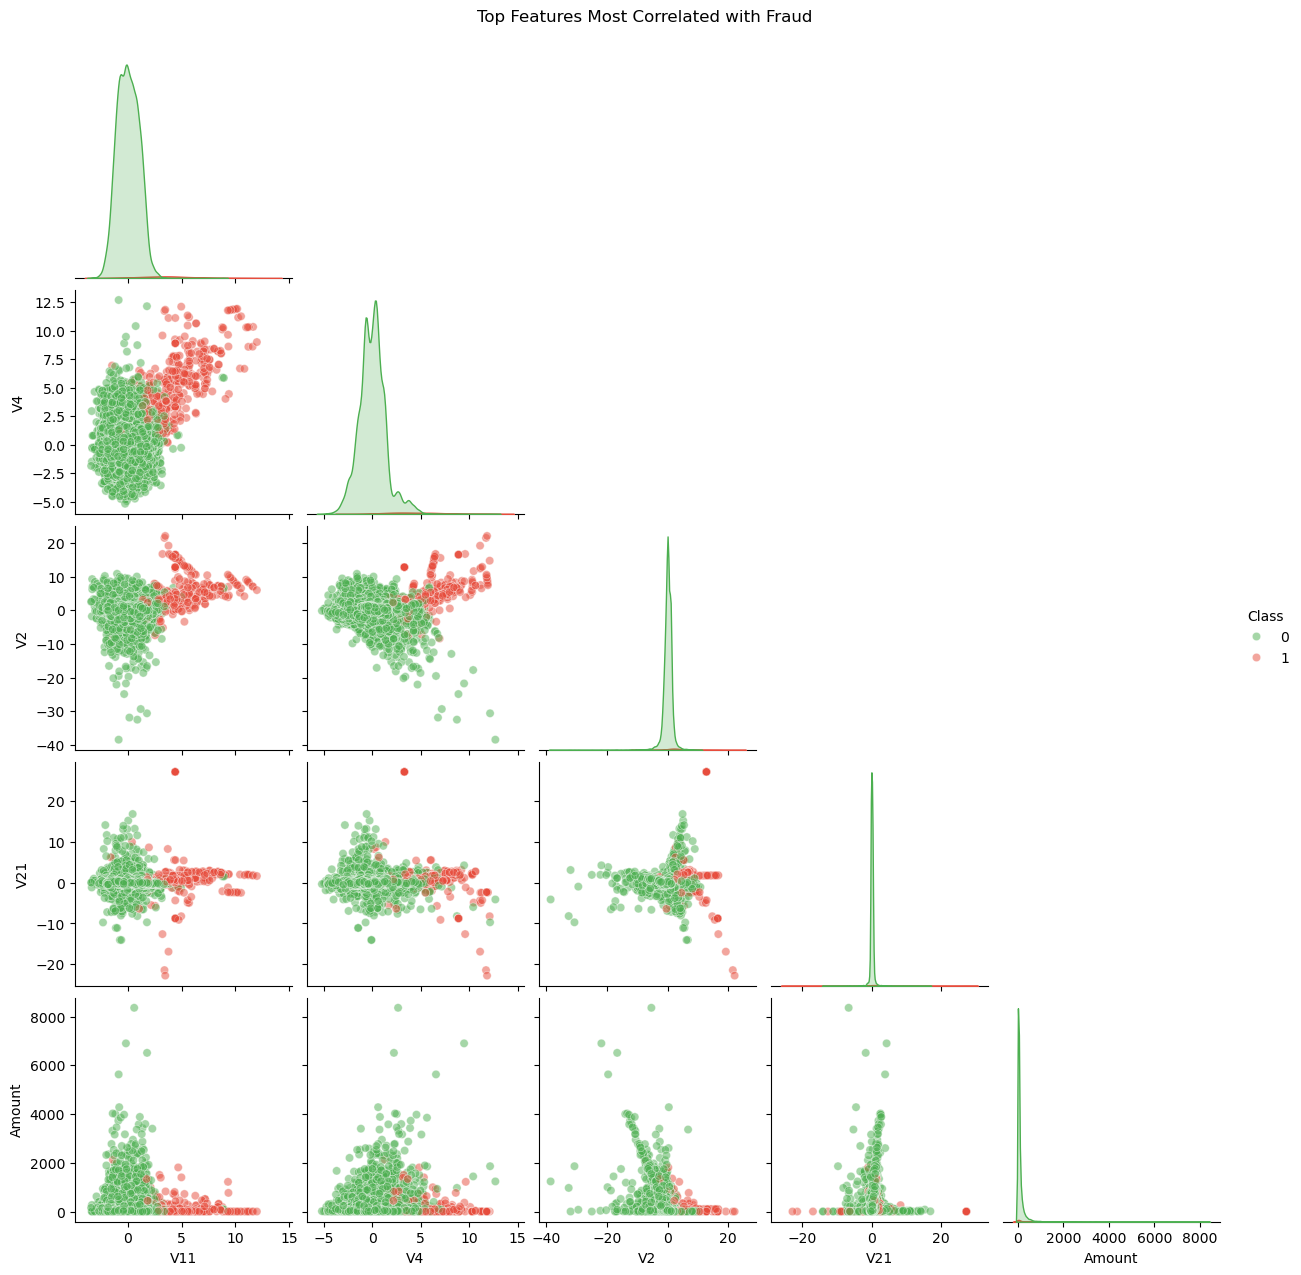

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top correlated features + Amount + Class
top_features = ['V11', 'V4', 'V2', 'V21', 'Amount', 'Class']

# Pairplot for top features
sns.pairplot(
    df[top_features],
    hue='Class',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.5},
    palette={0:'#4CAF50', 1:'#E74C3C'}  # green = non-fraud, red = fraud
)
plt.suptitle("Top Features Most Correlated with Fraud", y=1.02)
plt.show()


**Inference:**

- Fraudulent transactions tend to show up in different areas of the data compared to normal transactions, especially when looking at features like V11, V4, V2, and V21.
- The Amount of a transaction can overlap between fraud and non-fraud, but fraud is more common in smaller to medium amounts.
- This tells us that some features are better at spotting fraud than others.
- Because the patterns are a bit complicated, using more advanced models like Random Forest or XGBoost can do a better job than simple straight-line models at catching fraud.


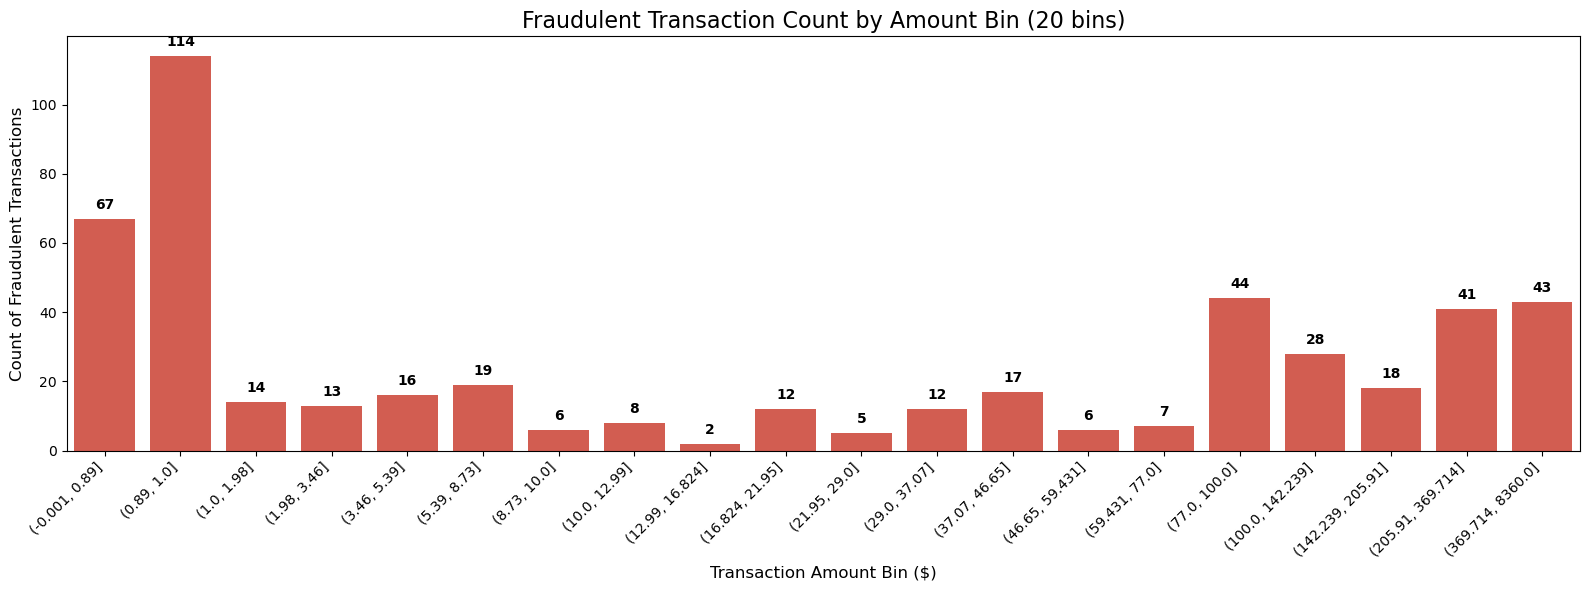

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no negative amounts
df['Amount'] = df['Amount'].clip(lower=0)

# Create 20 quantile-based bins
df['Amount_bin'] = pd.qcut(df['Amount'], q=20, duplicates='drop')

# Filter only fraud transactions
fraud_only = df[df['Class'] == 1]

# Count of fraud per bin
fraud_counts = fraud_only['Amount_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(16,6))
ax = sns.barplot(x=fraud_counts.index.astype(str), y=fraud_counts.values, color='#E74C3C')

# Add labels above each bar showing bin ranges
for i, value in enumerate(fraud_counts.values):
    ax.text(
        i,
        value + 2,  # small offset above bar
        f"{value}",  # show count
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Improve readability
plt.title("Fraudulent Transaction Count by Amount Bin (20 bins)", fontsize=16)
plt.xlabel("Transaction Amount Bin ($)", fontsize=12)
plt.ylabel("Count of Fraudulent Transactions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Observation:**  
- Most fraud happens with **small to medium transactions**, and very little occurs in very large transactions.  
- The chart shows which transaction amounts are most commonly targeted.  

**Implications for Modeling:**  
- Fraud can happen at any amount, so all transaction sizes should be considered.  
- Grouping transaction amounts into categories could help the model spot fraud more easily.



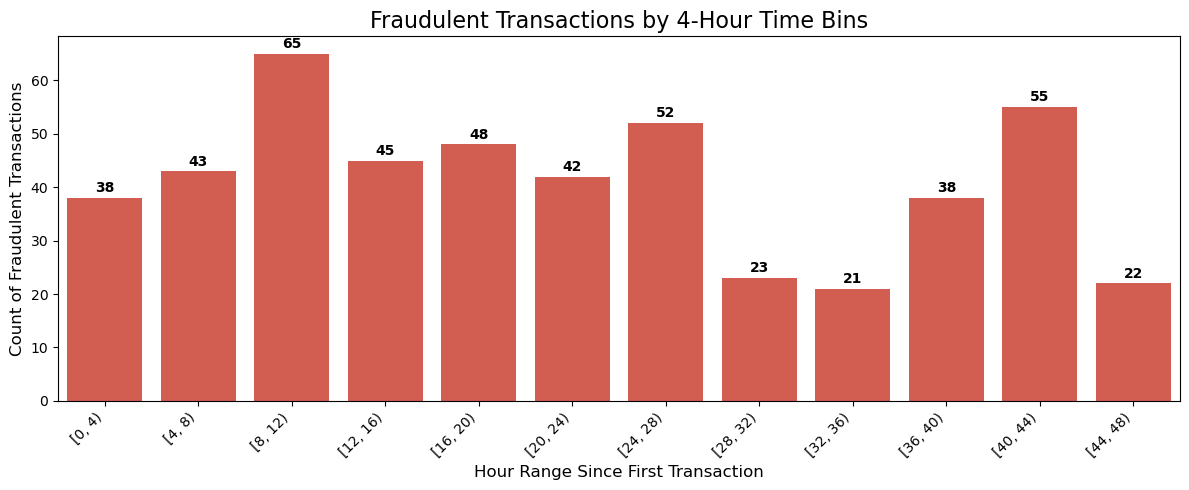

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Time to hours
df['Hour'] = (df['Time'] // 3600).astype(int)

# Create 4-hour bins for clarity (0-4, 4-8, ..., 44-48)
hour_bins = list(range(0, 49, 4))
df['Hour_bin'] = pd.cut(df['Hour'], bins=hour_bins, right=False)

# Filter only fraud transactions
fraud_only = df[df['Class'] == 1]

# Count fraud per 4-hour bin
fraud_hour_counts = fraud_only['Hour_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,5))
ax = sns.barplot(
    x=fraud_hour_counts.index.astype(str),
    y=fraud_hour_counts.values,
    color='#E74C3C'
)

# Add labels on top of bars
for i, value in enumerate(fraud_hour_counts.values):
    ax.text(
        i,
        value + 0.5,  # slight offset
        f"{value}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Improve readability
plt.title("Fraudulent Transactions by 4-Hour Time Bins", fontsize=16)
plt.xlabel("Hour Range Since First Transaction", fontsize=12)
plt.ylabel("Count of Fraudulent Transactions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**Observation:**  
- By grouping hours into 4-hour bins, the pattern of fraud is **much easier to see**.  
- Fraudulent transactions are **more frequent in certain periods**, while some bins have very few frauds.  
- This reduces the clutter compared to showing all 48 individual hours.

**Implications for Modeling:**  
- Aggregated time features (like 4-hour bins or day-part categories) are easier for models to interpret.  
- Time of day is an important predictor for fraud detection.  
- This approach makes the EDA cleaner and ready for reporting/submission.


## EDA Summary & Key Insights

### Key Insights
1. **Very Few Fraud Cases:** Only about **1.7% of transactions are fraudulent**, so the model needs to be careful to catch these rare cases.  
2. **Transaction Amounts:** Most fraud happens with **small to medium transactions**, while very large transactions are rarely targeted. The Amount values are uneven, so adjusting or grouping them could help.  
3. **Important Features:** Features **V11, V4, V2, and V21** are most connected to fraud and should be focused on when building the model.  
4. **Time Patterns:** Fraud tends to happen at certain times of day. Using features like **hour of day or time bins** could help detect fraud.  
5. **Outliers and Skewed Data:** Some features, including Amount, have extreme values. These should be handled carefully so the model isn’t biased.

### Next Steps
- **Prepare the Data:** Scale or transform uneven features (e.g., log-transform Amount, create time bins).  
- **Handle Imbalance:** Use methods like **oversampling, undersampling, or adjusting class weights** to deal with the few fraud cases.  
- **Build Models:** Try models like **Logistic Regression, Random Forest, XGBoost**, and check how well they detect fraud.  
- **Check Feature Importance:** See which features help the model the most, so we know what really drives fraud detection.
